# Importing Libraries

In [96]:
import numpy as np
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [97]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'E:/Faculity Projects/Semester6_projects/Artificial Intelligence/CNN,VGG/Plant Health Inspection using CNN and VGG/Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [98]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.applications import MobileNetV2



In [99]:
cnn=tf.keras.models.load_model('trained_plant_disease_model.keras')

In [100]:
vgg=tf.keras.models.load_model('fine_tuned_plant_disease_model_VGG.keras')

#Visualising and Performing Prediction on Single image

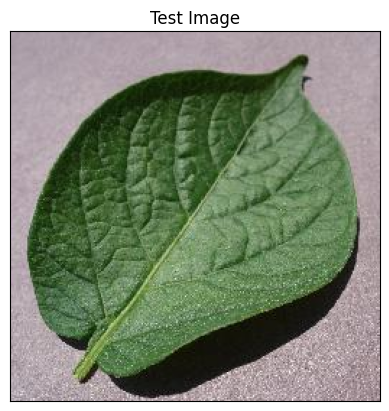

In [101]:
#Test Image Visualization
import cv2
image_path = 'E:/Faculity Projects/Semester6_projects/Artificial Intelligence/CNN,VGG/Plant Health Inspection using CNN and VGG/Data/test/test/PotatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [102]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
cnn_predictions = cnn.predict(input_arr)
VGG_predictions=vgg.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [103]:
print(cnn_predictions)

[[3.3152933e-04 6.5174219e-03 5.9656754e-06 9.6159359e-04 2.8256296e-05
  6.0990606e-05 1.1010250e-03 5.3185554e-06 9.1929614e-06 3.6121005e-06
  3.3476519e-07 7.7733202e-06 1.7890201e-06 2.3354100e-06 4.0797477e-05
  9.3198660e-06 1.1647867e-05 4.3892323e-05 1.6741070e-04 1.2719884e-03
  2.3684668e-04 9.4831287e-04 9.8540503e-01 9.8834505e-05 8.1253325e-05
  2.5656975e-06 1.0020772e-05 9.0254046e-04 1.8058177e-05 1.2337818e-04
  2.8102883e-04 9.6300273e-06 8.6264202e-04 8.3381556e-06 4.0718197e-04
  1.3124986e-06 8.8009028e-06 1.2057939e-05]]


In [104]:
print(VGG_predictions)

[[1.1111180e-13 7.8506727e-13 3.5249985e-15 2.3645058e-15 1.1092991e-09
  5.0513841e-13 2.0152940e-12 6.8016148e-11 1.4412913e-15 3.0927809e-14
  5.9415774e-15 3.4463907e-15 1.6613753e-13 1.6396088e-14 1.4410274e-15
  6.9359167e-13 1.3941413e-16 5.1473696e-13 6.1260492e-14 3.9306972e-10
  4.5189554e-09 1.4978504e-07 9.9999988e-01 1.6734874e-11 2.9735741e-09
  5.5642621e-14 5.9839265e-13 3.4166603e-09 8.6030911e-13 2.3018861e-11
  3.1653864e-11 6.0381813e-16 4.1910812e-11 5.3306738e-14 1.7139345e-11
  1.8253938e-14 3.2579513e-16 3.0818006e-09]]


In [105]:
cnn_result_index = np.argmax(cnn_predictions) #Return index of max element
print(cnn_result_index)

22


In [106]:
vgg_result_index = np.argmax(VGG_predictions) #Return index of max element
print(vgg_result_index)

22


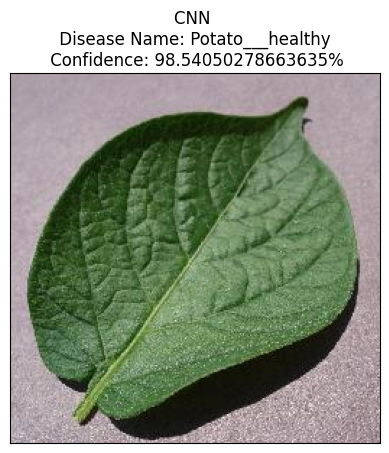

In [107]:
# Displaying the disease prediction
model_prediction = class_name[cnn_result_index]
confedence=cnn_predictions[0][cnn_result_index]
plt.imshow(img)
plt.title(f"CNN \n Disease Name: {model_prediction} \n Confidence: {str(confedence*100)}%")
plt.xticks([])
plt.yticks([])
plt.show()

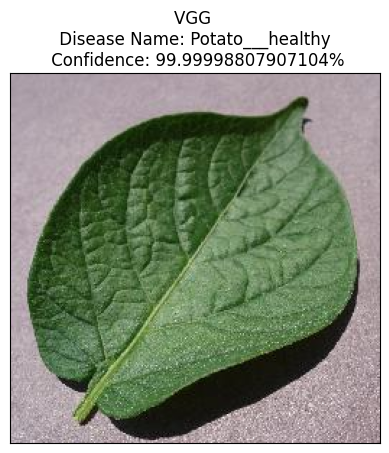

In [108]:
# Displaying the disease prediction
model_prediction = class_name[vgg_result_index]
confedence=VGG_predictions[0][vgg_result_index]
plt.imshow(img)
plt.title(f"VGG \n Disease Name: {model_prediction} \n Confidence: {str(confedence*100)}%")
plt.xticks([])
plt.yticks([])
plt.show()